In [1]:
# August 8 2017
# This file is for experiments with student2 5 skills and training trajectory length 6,7,8
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

# Training Trajectory 6

(10, 41)
last 1.34643169057e-06 threshold 0.0001


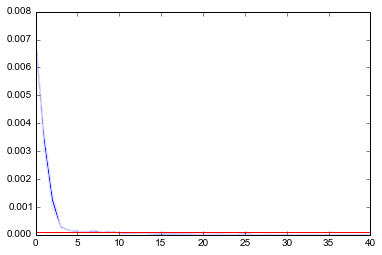

In [7]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.0001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,40],[x_end,x_end],color='#ff0000')
plot([0,40],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
#ylim(0.0000,0.0002)

# looks like epoch 28 is good for 0.00001
# looks like epoch 10 is good for 0.0001

vloss shape (20, 29)
scores shape (20,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


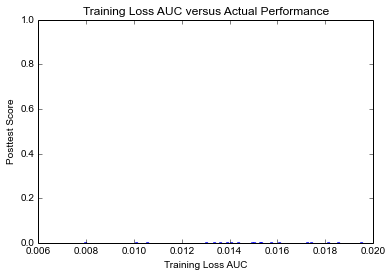

In [2]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
#six.print_(qvals)

graph_trainauc_score(vloss, scores)

# Training Trajectories Length 7 and 8

(10, 31)
last 4.25936310418e-07 threshold 1e-05


(0.0, 0.0001)

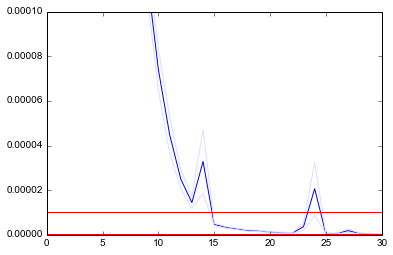

In [4]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,30],[x_end,x_end],color='#ff0000')
plot([0,30],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(0.0000,0.0001)

# looks like epoch 15 is good for 0.00001

(10, 31)
last 1.15557909636e-06 threshold 1e-05


(0.0, 0.0001)

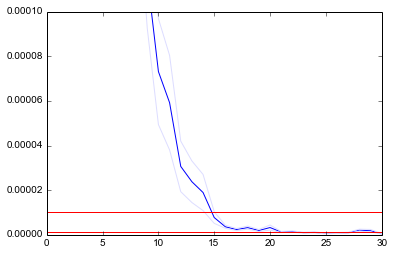

In [5]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,30],[x_end,x_end],color='#ff0000')
plot([0,30],[x_thres,x_thres],color='#ff0000')

#xlim(25, 30)
ylim(0.0000,0.0001)

# looks like epoch 15 is good for 0.00001

vloss shape (20, 16)
scores shape (20,)
[ 1.     0.375  0.     0.     1.     1.     0.125  0.     1.     0.     0.75
  0.     0.5    1.     1.     1.     1.     0.     0.     0.   ]
[  7.24408010e-01   3.05211963e-02   6.99944151e-01   1.77136724e-03
   5.84004810e-01   6.11965526e-01   1.99812452e-01   4.10932904e-01
   3.50446919e-01   2.59724932e-03   2.39833793e-02   2.27420829e-01
   2.81952109e-01   4.84481321e-01   6.86139355e-01   6.53231437e-01
   6.41810657e-01   1.30688141e-01   2.86649182e-04   3.10328132e-01]


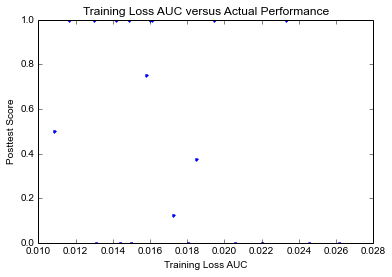

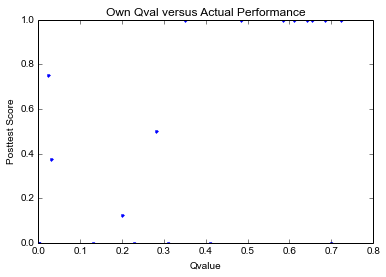

In [6]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

vloss shape (20, 16)
scores shape (20,)
[ 1.   1.   1.   1.   0.   1.   1.   0.5  1.   1.   0.   1.   1.   1.   1.
  1.   1.   1.   1.   1. ]


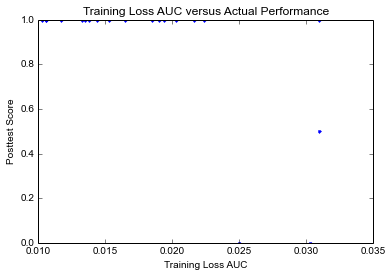

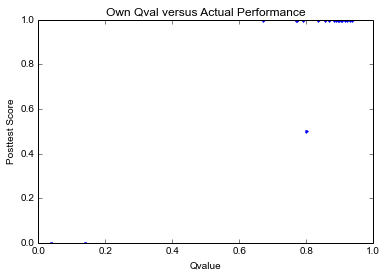

In [7]:
'''
Analyzing results of student2 with 5 skills, with training length 8 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)